# AUDIO

In [16]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly[audio]
!sudo apt-get install python3-magic
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


* Load input Data

In [18]:
import os
import augly.audio as audaugs
import augly.utils as utils
from IPython.display import display, Audio

# Get input audio
input_audio = '/content/vad-go-stereo-44100.wav'

display(Audio(input_audio))

* Augment the data with female voice

In [19]:
# Now we can apply various augmentations to the audio!
aug_audio, sr = audaugs.pitch_shift(input_audio, n_steps=4.0)
display(Audio(aug_audio, rate=sr))

* Another way is to lag the audio

In [20]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended, including kwargs, the durations & number of
channels of the input & output audio clips, the matching segments in the
input/output audio clips (useful in case of temporal editing), and intensity
(defined based on the kwargs for each augmentation).
"""
meta = []
aug_audio, sr = audaugs.time_stretch(
    input_audio,
    rate=0.5,
    metadata=meta,
)
display(Audio(aug_audio, rate=sr))
meta

[{'name': 'time_stretch',
  'src_duration': 0.9827437641723356,
  'dst_duration': 1.965487528344671,
  'src_num_channels': 2,
  'dst_num_channels': 2,
  'src_sample_rate': 44100,
  'dst_sample_rate': 44100,
  'src_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'dst_segments': [{'start': 0.0, 'end': 1.965487528344671}],
  'output_path': None,
  'rate': 0.5,
  'intensity': 20.0}]

In [21]:
# For all the augmentations, we have class-based definitions as well as
# functional
from augly.audio.utils import validate_and_load_audio

input_audio_arr, sr = validate_and_load_audio(input_audio)
meta = []
aug = audaugs.PeakingEqualizer()
aug_audio, sr = aug(input_audio_arr, sample_rate=sr, metadata=meta)
display(Audio(aug_audio, rate=sr))
meta

[{'name': 'peaking_equalizer',
  'src_duration': 0.9827437641723356,
  'dst_duration': 0.9827437641723356,
  'src_num_channels': 2,
  'dst_num_channels': 2,
  'src_sample_rate': 44100,
  'dst_sample_rate': 44100,
  'src_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'dst_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'center_hz': 500.0,
  'q': 1.0,
  'gain_db': -3.0,
  'output_path': None,
  'intensity': 2.66798418972332}]

In [22]:
# You can also compose several transformations together
meta = []
aug = audaugs.Compose(
    [
        audaugs.AddBackgroundNoise(),
        audaugs.ToMono(),
        audaugs.Clicks(),
    ]
)
aug_audio, sr = aug(input_audio_arr, sample_rate=sr, metadata=meta)
display(Audio(aug_audio, rate=sr))
meta

[{'name': 'add_background_noise',
  'src_duration': 0.9827437641723356,
  'dst_duration': 0.9827437641723356,
  'src_num_channels': 2,
  'dst_num_channels': 2,
  'src_sample_rate': 44100,
  'dst_sample_rate': 44100,
  'src_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'dst_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'background_audio': None,
  'snr_level_db': 10.0,
  'output_path': None,
  'background_duration': 0.9827437641723356,
  'intensity': 90.9090909090909},
 {'name': 'to_mono',
  'src_duration': 0.9827437641723356,
  'dst_duration': 0.9827437641723356,
  'src_num_channels': 2,
  'dst_num_channels': 1,
  'src_sample_rate': 44100,
  'dst_sample_rate': 44100,
  'src_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'dst_segments': [{'start': 0.0, 'end': 0.9827437641723356}],
  'output_path': None,
  'intensity': 100.0},
 {'name': 'clicks',
  'src_duration': 0.9827437641723356,
  'dst_duration': 0.9827437641723356,
  'src_num_channels': 1,
  'dst_n

# Image Augmentation

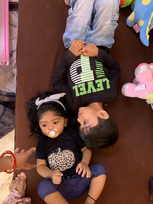

In [23]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = '/content/image.jpg'

# We can use the AugLy scale augmentation
input_img = imaugs.scale(input_img_path, factor=0.2)
display(input_img)

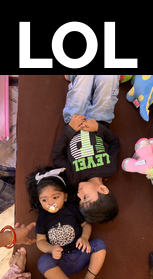

In [25]:
# Now we can apply various augmentations to the scaled image!
display(
    imaugs.meme_format(
        input_img,
        caption_height=75,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )
)

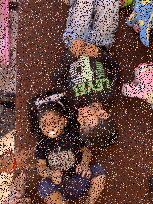

[{'name': 'shuffle_pixels',
  'src_width': 153,
  'src_height': 204,
  'dst_width': 153,
  'dst_height': 204,
  'output_path': None,
  'factor': 0.3,
  'seed': 10,
  'bbox_format': None,
  'intensity': 30.0}]

In [26]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended, including kwargs, input & output
dimensions, and intensity (defined based on the kwargs for each
augmentation).
"""
meta = []
display(imaugs.shuffle_pixels(input_img, factor=0.3, metadata=meta))
meta

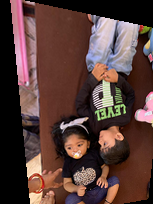

[{'name': 'perspective_transform',
  'src_width': 153,
  'src_height': 204,
  'dst_width': 153,
  'dst_height': 204,
  'output_path': None,
  'seed': 42,
  'crop_out_black_border': False,
  'bbox_format': None,
  'dx': 0.0,
  'dy': 0.0,
  'sigma': 20.0,
  'intensity': 20.0}]

In [30]:

# For all the augmentations, we have class-based definitions as well as
# functional
meta = []
aug = imaugs.PerspectiveTransform(sigma=20.0)
display(aug(input_img, metadata=meta))
meta
     

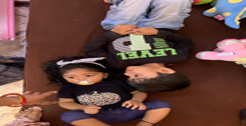

[{'name': 'change_aspect_ratio',
  'src_width': 153,
  'src_height': 204,
  'dst_width': 246,
  'dst_height': 126,
  'output_path': None,
  'ratio': 1.9513604985725888,
  'bbox_format': None,
  'intensity': 19.513604985725888}]

In [31]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.RandomAspectRatio()
display(aug(input_img, metadata=meta))
meta

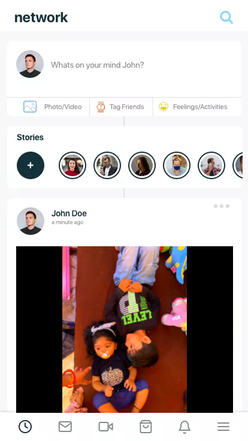

[{'name': 'saturation',
  'src_width': 153,
  'src_height': 204,
  'dst_width': 153,
  'dst_height': 204,
  'output_path': None,
  'factor': 2.0,
  'bbox_format': None,
  'intensity': 20.0},
 {'name': 'overlay_onto_screenshot',
  'src_width': 153,
  'src_height': 204,
  'dst_width': 414,
  'dst_height': 736,
  'output_path': None,
  'template_filepath': '/usr/local/lib/python3.9/dist-packages/augly/assets/screenshot_templates/mobile.png',
  'template_bboxes_filepath': '/usr/local/lib/python3.9/dist-packages/augly/assets/screenshot_templates/bboxes.json',
  'max_image_size_pixels': None,
  'crop_src_to_fit': False,
  'resize_src_to_match_template': True,
  'bbox_format': None,
  'intensity': 66.9725372820836},
 {'name': 'scale',
  'src_width': 414,
  'src_height': 736,
  'dst_width': 248,
  'dst_height': 441,
  'output_path': None,
  'factor': 0.6,
  'interpolation': None,
  'bbox_format': None,
  'intensity': 16.666666666666668}]

In [32]:
# You can also compose several transformations together
meta = []
aug = imaugs.Compose(
    [
        imaugs.Saturation(factor=2.0),
        imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        ),
        imaugs.Scale(factor=0.6),
    ]
)
display(aug(input_img, metadata=meta))
meta

In [33]:
# AugLy also integrates seamlessly with PyTorch transforms
# Note: you must have torchvision installed, which it is by default in colab
import torchvision.transforms as transforms

aug = transforms.Compose(
    [
        imaugs.Brightness(factor=2.0),
        imaugs.RandomRotation(),
        transforms.ToTensor(),
    ]
)
type(aug(input_img))

torch.Tensor

In [34]:
# We also provide a numpy wrapper in case your data is in np.ndarray format
import numpy as np
from augly.image import aug_np_wrapper, overlay_emoji

np_image = np.zeros((300, 300))
# pass in function arguments as kwargs
np_aug_img = aug_np_wrapper(np_image, overlay_emoji, **{'opacity': 0.5, 'y_pos': 0.45})
type(np_aug_img)

numpy.ndarray

# Text Augmentation

In [35]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly[text]
!sudo apt-get install python3-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 KB 18.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [36]:
import augly.text as textaugs

# Define input text
input_text = "Hello, world! How are you today?"
input_text
     

'Hello, world! How are you today?'

* We can augmnet data bi introducting typo errors

In [37]:
# Now we can apply various augmentations!
print(textaugs.simulate_typos(input_text))

Hello, world! How ar you todya?


* Another way is to change text font

In [38]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended including kwargs and intensity (defined based on
the kwargs for each augmentation).
"""
meta = []
print(
    textaugs.replace_fun_fonts(
        input_text, vary_fonts=True, granularity="word", metadata=meta
    )
)
meta

Hello, 𝔀𝓸𝓻𝓵𝓭! H̾o̾w̾ are you today?


[{'name': 'replace_fun_fonts',
  'input_type': 'string',
  'src_length': 1,
  'dst_length': 35,
  'aug_p': 0.3,
  'aug_min': 1,
  'aug_max': 10000,
  'granularity': 'word',
  'vary_fonts': True,
  'fonts_path': '/usr/local/lib/python3.9/dist-packages/augly/assets/text/fun_fonts.json',
  'n': 1,
  'priority_words': None,
  'intensity': 30.0}]

In [39]:
# For all the augmentations, we have class-based definitions as well as
# functional
meta = []
aug = textaugs.ReplaceSimilarUnicodeChars(aug_word_p=0.6)
print(aug(input_text, metadata=meta))
meta
     

Héllo, worlĎ! Hoฬ are ௶ou toďay?


[{'name': 'replace_similar_unicode_chars',
  'input_type': 'string',
  'src_length': 1,
  'dst_length': 32,
  'aug_char_p': 0.3,
  'aug_word_p': 0.6,
  'min_char': 2,
  'aug_char_min': 1,
  'aug_char_max': 1000,
  'aug_word_min': 1,
  'aug_word_max': 1000,
  'n': 1,
  'mapping_path': '/usr/local/lib/python3.9/dist-packages/augly/assets/text/letter_unicode_mapping.json',
  'priority_words': None,
  'intensity': 18.0}]

* Or by swapping genders in text

In [40]:
# You can evaluate the fairness of your model by swapping gender in text
# inputs & evaluating the performance!
gendered_text = "She has two brothers, but she always wanted a sister"
aug = textaugs.SwapGenderedWords(aug_word_p=1.0)
print(aug(gendered_text))

He has two sisters, but he always wanted a brother


* We can augment by contractung words like (you are to you're)

In [41]:
aug = textaugs.Contractions(aug_p=1.0)
print(aug(input_text))

["Hello, world! How're you today?"]
